In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Display settings
pd.set_option("display.max_columns", None)
sns.set_style("darkgrid")


In [3]:
# Load the dataset
df = pd.read_csv("netflix_titles.csv")

In [4]:
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [5]:
print("Shape:", df.shape)

Shape: (8807, 12)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [7]:
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [9]:
df.drop_duplicates(inplace=True)

In [11]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


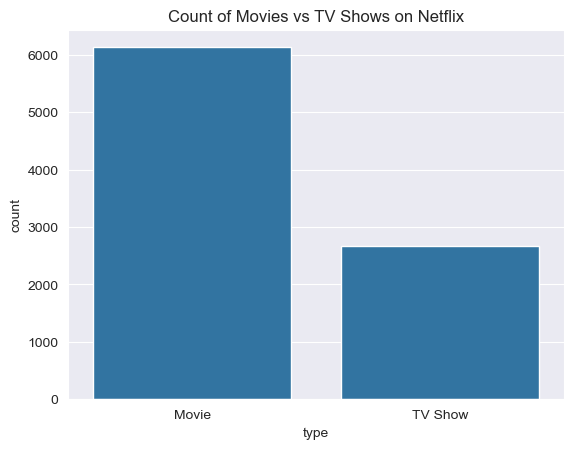

In [13]:
sns.countplot(data=df, x="type")
plt.title("Count of Movies vs TV Shows on Netflix")
plt.show()

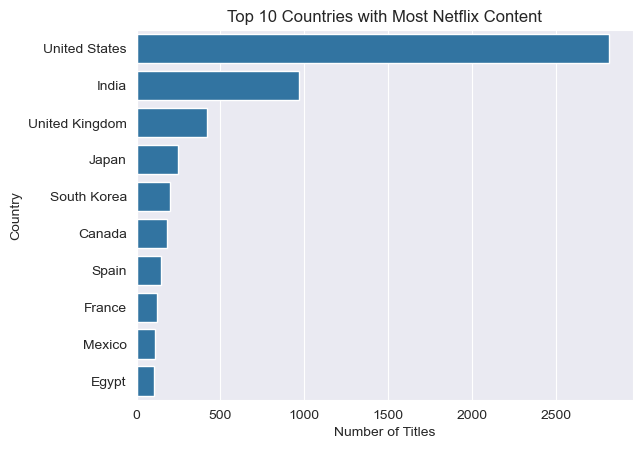

In [15]:
top_countries = df['country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index, )
plt.title("Top 10 Countries with Most Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


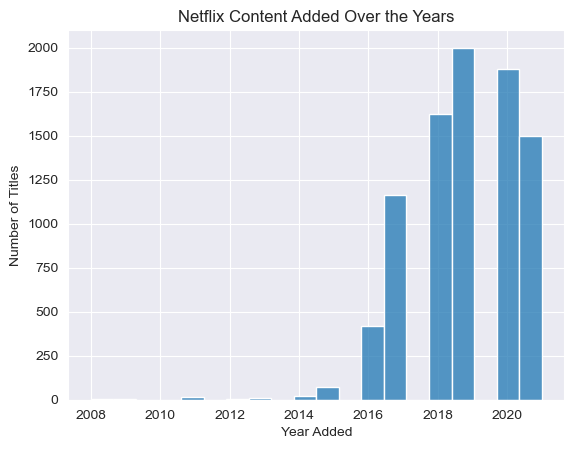

In [16]:
df['year_added'] = df['date_added'].dt.year

sns.histplot(df['year_added'].dropna(), bins=20, kde=False)
plt.title("Netflix Content Added Over the Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles")
plt.show()


C:\Users\kirub\AppData\Local\Temp\ipykernel_21924\4172197508.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette="cubehelix")


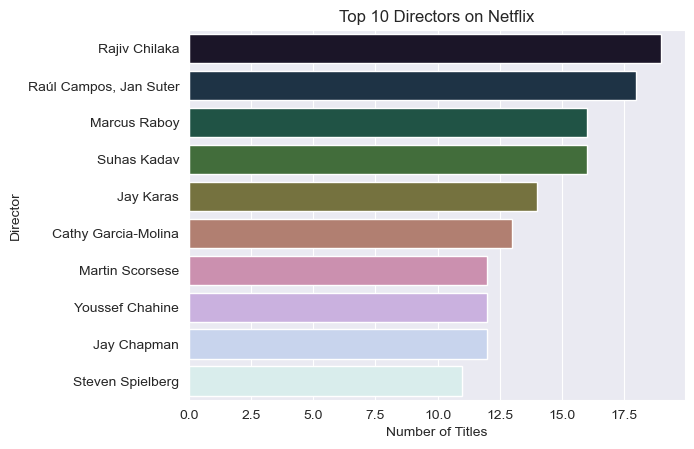

In [17]:
top_directors = df['director'].value_counts().head(10)

sns.barplot(x=top_directors.values, y=top_directors.index, palette="cubehelix")
plt.title("Top 10 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


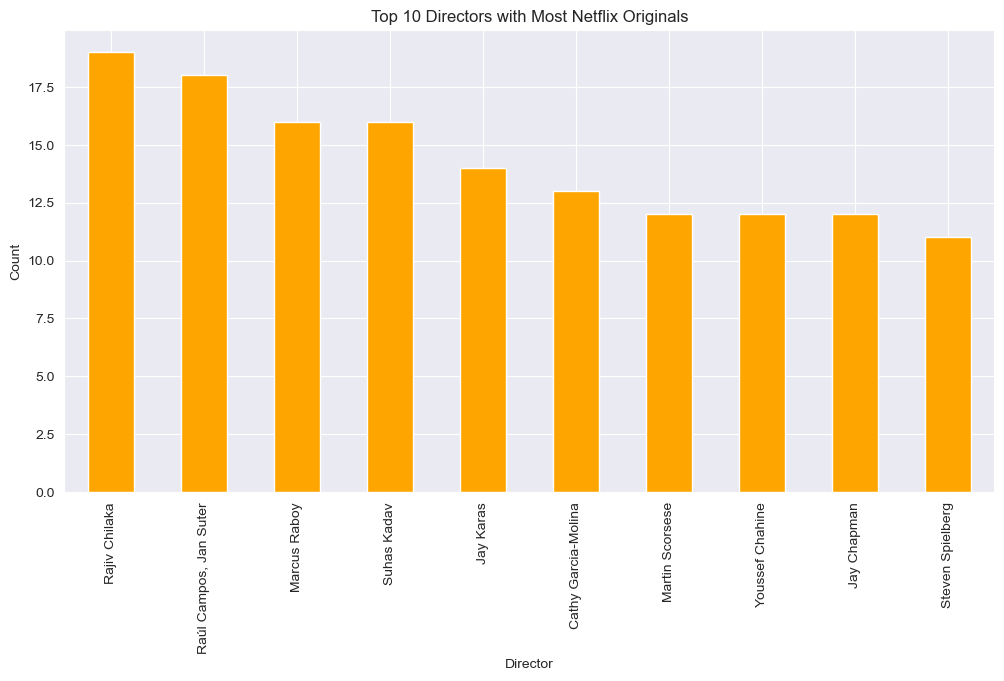

In [18]:
plt.figure(figsize=(12,6))
df['director'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title("Top 10 Directors with Most Netflix Originals")
plt.xlabel("Director")
plt.ylabel("Count")
plt.show()


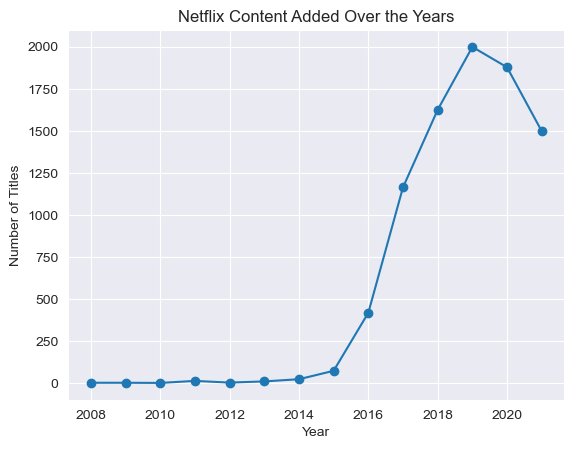

In [19]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Netflix Content Added Over the Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()
